In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data=pd.read_csv('C:/Users/My PC/Downloads/covid.csv')
data.head()

,pc,wbc,mc,ast,bc,ldh,diagnosis
0,Low,Low,Low,High,Normal,Normal,True
1,Low,Low,Normal,High,Normal,High,True
2,Low,High,Normal,High,Normal,Normal,False
3,Low,High,Normal,High,High,Normal,True
4,Low,Normal,High,High,Normal,Normal,False


In [3]:
le=preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)
X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

In [4]:
X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [5]:
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [6]:
model=MultinomialNB()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [7]:
print("Acuuracy: ",accuracy_score(Y_test,Y_pred))

Acuuracy:  0.42857142857142855


In [8]:
print("Report: ")
print(classification_report(Y_test,Y_pred))

Report: 
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.40      0.67      0.50         3

    accuracy                           0.43         7
   macro avg       0.45      0.46      0.42         7
weighted avg       0.46      0.43      0.40         7



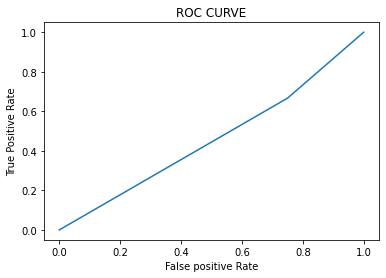

In [9]:
fpr,tpr,thresholds=metrics.roc_curve(Y_test,Y_pred,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.show()